# Machine Learning - Modelo de Classificação



### Usando SVM (Suporte Vector Machine)  Para Prever a Intenção de Compra de Usuários de E-Commerce

### Definição do Problema de Negócio:

Avaliar quais atributos influenciam um usuário na compra de produtos online e construir um modelo preditivo para realizar previsões de compras futuras.

O conjunto de dados consiste em valores de recursos pertencentes a 12.330 sessões online. O conjunto de dados foi formado de modo que cada sessão pertença a um usuário diferente em um período de 1 ano para evitar qualquer tendência para uma campanha específica, dia especial, usuário, perfil ou período.

O conjunto de dados consiste em 10 atributos numéricos e 8 categóricos. O atributo 'Revenue' pode ser usado como o rótulo da classe, ou seja, nossa variável ALVO)

Fonte:
[Online Shoppers Purchasing Intention Dataset](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset)

In [2]:
# Bibliotecas Necessárias
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
from sklearn import svm
import sklearn
import matplotlib
import warnings
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
warnings.filterwarnings("ignore")
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [3]:
pip install imblearn

In [4]:
#Leitura da Base
data_original = pd.read_csv('/content/online_shoppers_intention.csv')

In [5]:
data_original.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


## Dicionario dos dados

- Administrativo: Número de páginas administrativas visitadas pelo usuário durante uma sessão.

- Duração Administrativa: Tempo total gasto nas páginas administrativas durante uma sessão.

- Informativo: Número de páginas informativas visitadas pelo usuário durante uma sessão.

- Duração Informativo: Tempo total gasto nas páginas informativas durante uma sessão.

- Relacionado ao Produto: Número de páginas relacionadas ao produto visitadas pelo usuário durante uma sessão.

- Duração Relacionada ao Produto: Tempo total gasto nas páginas relacionadas ao produto durante uma sessão.

- Taxa de Rejeição: Porcentagem de visitantes que entram em uma página e saem sem interagir com outras solicitações ao servidor durante a sessão.

- Taxa de Saída: Porcentagem de visualizações de página em que a página foi a última na sessão.

- Valor da Página: Valor médio de uma página da web visitada antes de concluir uma transação de comércio eletrônico.

- Dia Especial: Indica a proximidade da visita do site a um dia especial, considerando a dinâmica do comércio eletrônico.

- Sistema Operacional: Tipo de sistema operacional utilizado pelo usuário.

- Navegador: Tipo de navegador utilizado pelo usuário.

- Região: Região geográfica associada à sessão do usuário.

- Tipo de Tráfego: Categoria que descreve o tipo de tráfego, como direto, referência, pesquisa, etc.

- Tipo de Visitante: Indica se o visitante é novo ou recorrente.

- Final de Semana: Indicador booleano se a visita ocorreu durante o final de semana.

- Mês do Ano: Indica o mês do ano em que a sessão ocorreu.

- Receita (Revenue): Variável alvo booleana, True se a sessão gerou receita e False se não gerou.

## Analise Exploratória

In [6]:
#dimensão dos dados
data_original.shape

(12330, 18)

In [7]:
#tipo doas variaveis
data_original.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [8]:
#Verificando valores missing
contagem_na = data_original.isna().sum()
print(contagem_na)

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [9]:
data_original.shape


(12330, 18)

In [10]:
#verificando valores unicos para cada variavel
data_original.nunique()

Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

Para facilitar a visualização vamos dividir os dados em variaveis contínuas e categóricas. Vamos tratar variaveis com menos de 30 entradas unicas como categóricas.

In [11]:
#Preparando dados para a plotagem do gráfico

#Copiando o dataset original
df = data_original.copy()

#Listas para as variaveis resultantes
v_continuas = []
v_categoricas = []

# Percorrendo as colunas

for i in df.columns[:-1]:
  #Separando em continuas
  if df.nunique()[i] >=30:
    v_continuas.append(i)
  #Se a primeira condição não for atendida separa em categórica
  else:
    v_categoricas.append(i)


Vamos visualizar a separação das variaveis

In [12]:
v_categoricas

['Administrative',
 'Informational',
 'SpecialDay',
 'Month',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType',
 'VisitorType',
 'Weekend']

In [13]:
v_continuas

['Administrative_Duration',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues']

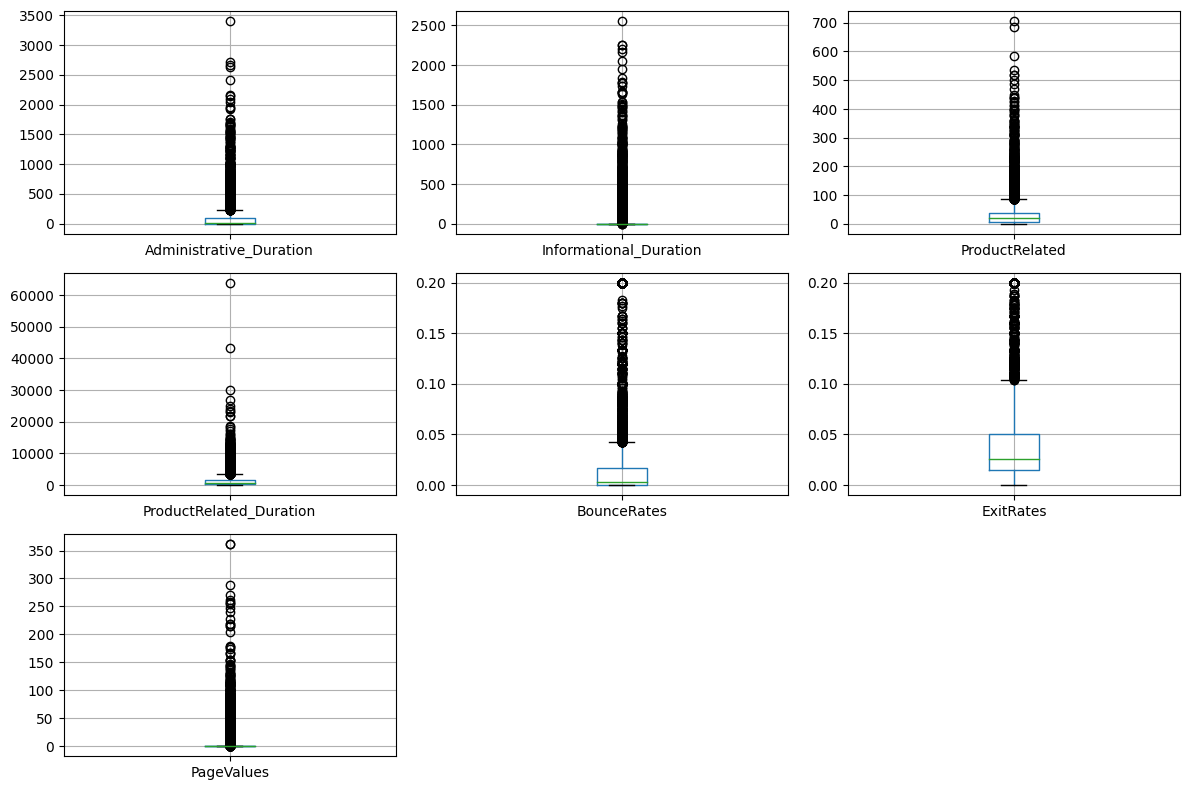

In [14]:
#Plotagem das figuras:

fig = plt.figure(figsize = (12,8))

# Loop pelas variaveis continuas

for i , col in enumerate(v_continuas):
  plt.subplot(3,3,i+1);
  df.boxplot(col);
  plt.tight_layout()

Claramente as variaveis apresentam uma distorção nos dados. Para corrigir isso, vamos aplicar uma função logaritmica

In [15]:
df[v_continuas] = np.log1p(1 + df[v_continuas])

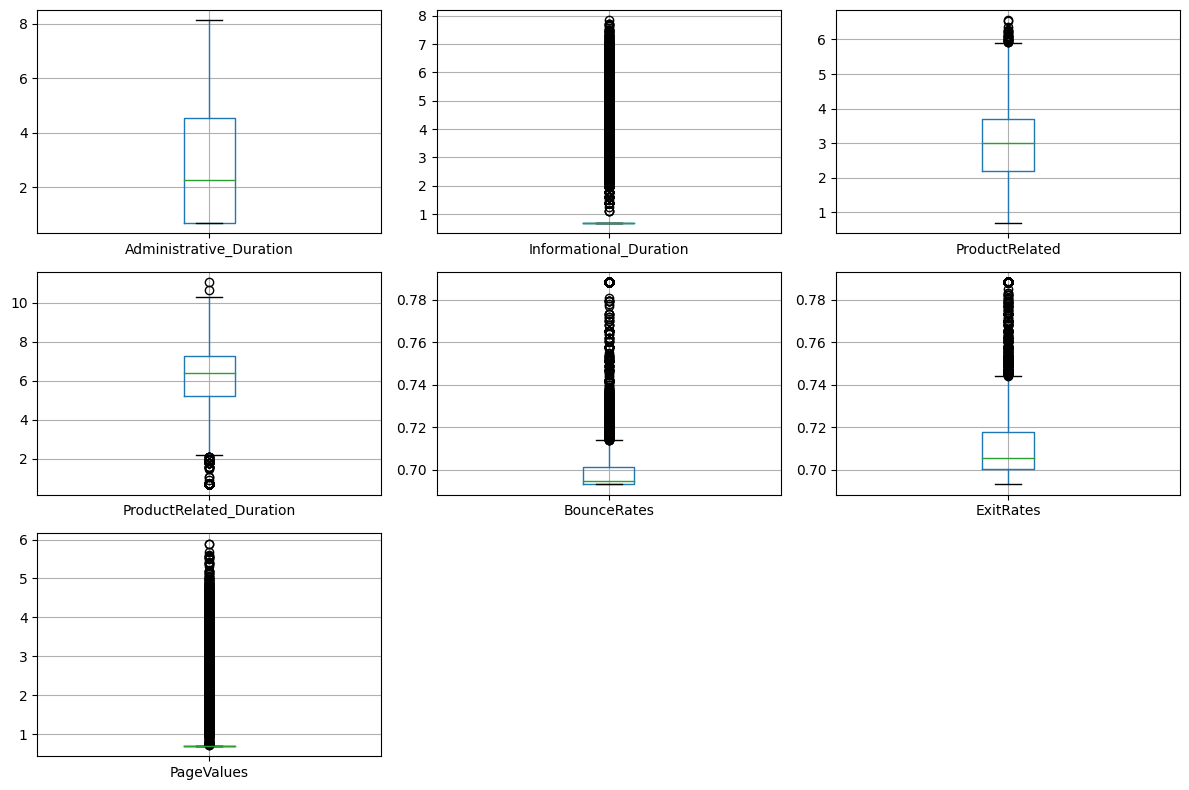

In [16]:
#Plotagem das figuras:

fig = plt.figure(figsize = (12,8))

# Loop pelas variaveis continuas

for i , col in enumerate(v_continuas):
  plt.subplot(3,3,i+1);
  df.boxplot(col);
  plt.tight_layout()

Claramente ja tivemos uma melhora siginificativa nas variaveis.

Como proximo passo vamos plotar a matriz de correlação dos dados, para observar qual a influencia que uma variavel tem na outra:

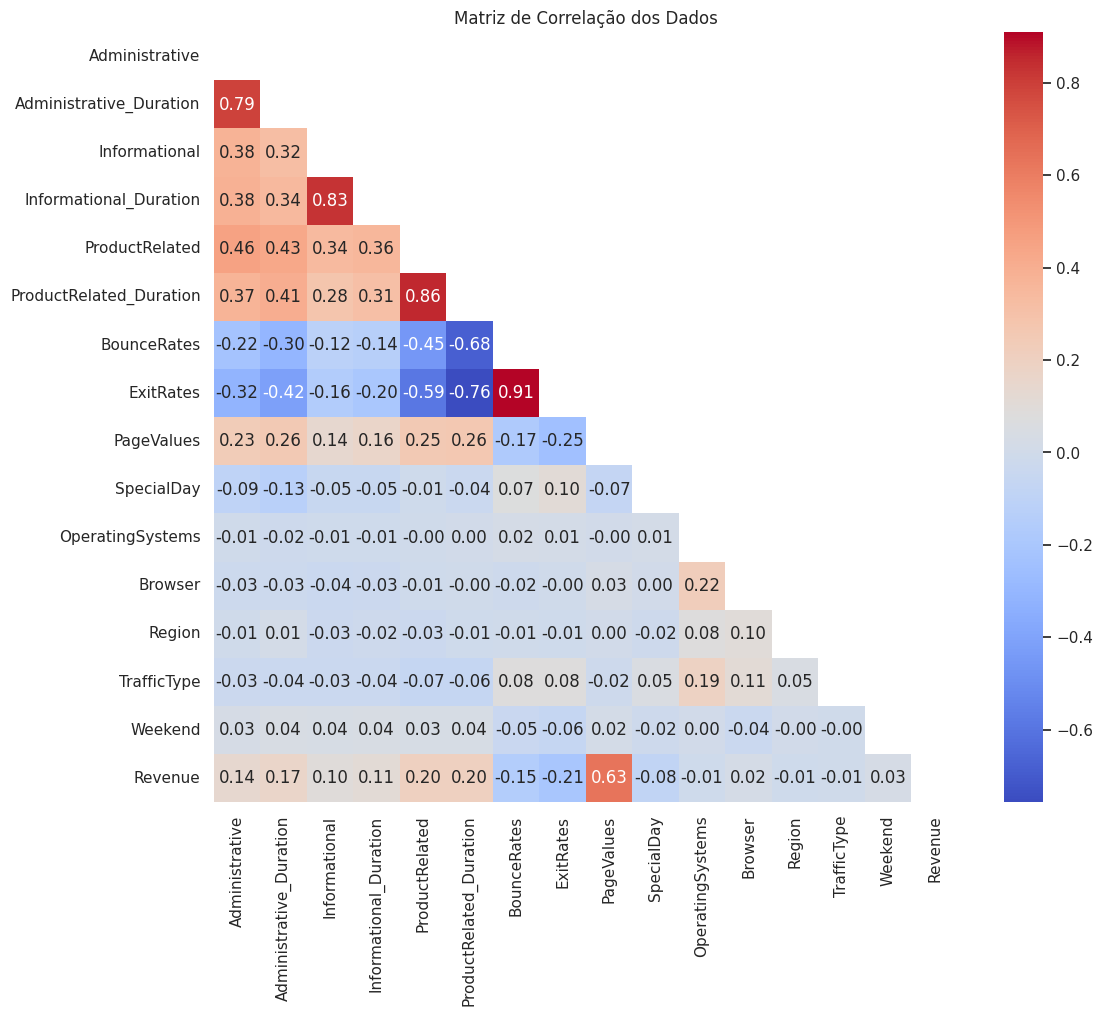

In [17]:
matriz_correlacao = df.corr()

# Configuração do Seaborn para uma melhor visualização
sns.set(style="white")

mask = np.triu(np.ones_like(matriz_correlacao, dtype=bool))

# Configuração do tamanho da figura
plt.figure(figsize=(12, 10))

# Plotando a matriz de correlação usando Seaborn
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f", mask=mask)

# Título do gráfico
plt.title("Matriz de Correlação dos Dados")

# Exibindo o gráfico
plt.show()

Com  a tabela acima ja é possível identificaar as correlações entre as variáveis. Por enquanto vamos guardar essas informações...

Vamos visualizar o grafico das variaveis categóricas, para verificar como nossa variavel alvo "Revanue", é influenciada por elas

In [18]:
df['Revenue'].nunique()

2


Vemos que a variável 'Revanue' possui dois valores. Essa variável representa a conversão de venda ou não. Vamos plotar um gráfico de barras mostrando a contagem desses dois valores para verificar como os valores dessa variável estão distribuídos. O motivo dessa verificação é identificar se existe a necessidade de balanceamento dos dados ou não, até para evitar possíveis vieses em nosso modelo.

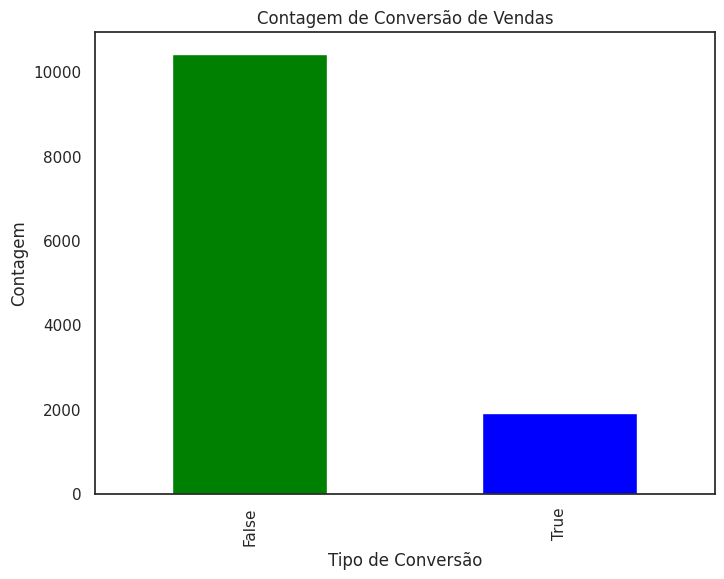

In [19]:
plt.figure(figsize=(8, 6))
df['Revenue'].value_counts().plot(kind='bar', color=['green', 'blue'])
plt.title('Contagem de Conversão de Vendas')
plt.xlabel('Tipo de Conversão')
plt.ylabel('Contagem')
plt.show()

Como podemos visualizar acima, a contagem de valores falsos, ou seja, aqueles que não foram convertidos em venda, é discrepante se comparada aos valores verdadeiros. Portanto, já sabemos que será necessário lidar com isso antes de projetarmos nosso modelo.

Prosseguindo, vamos visualizar a distribuição de tipo de Visitante:

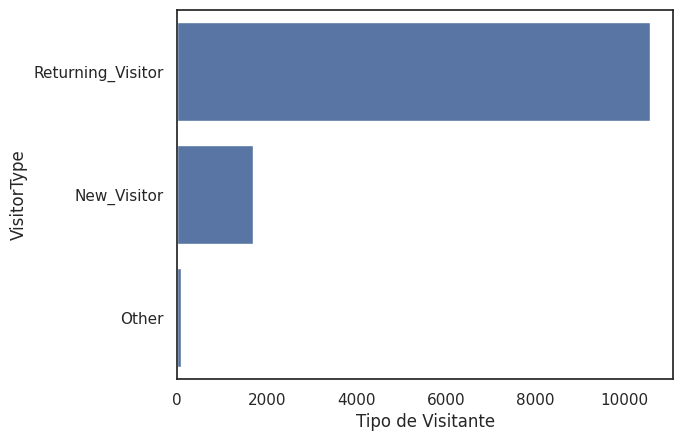

In [20]:
plt.xlabel('Tipo de Visitante')
sns.countplot(df['VisitorType'])
plt.show()

Vamos plotar um stakebar para visualizar como a distribuição de tipo de visitante influencia na venda. Além de visualizar a conversão ou não de venda em cada tipo de visitante.

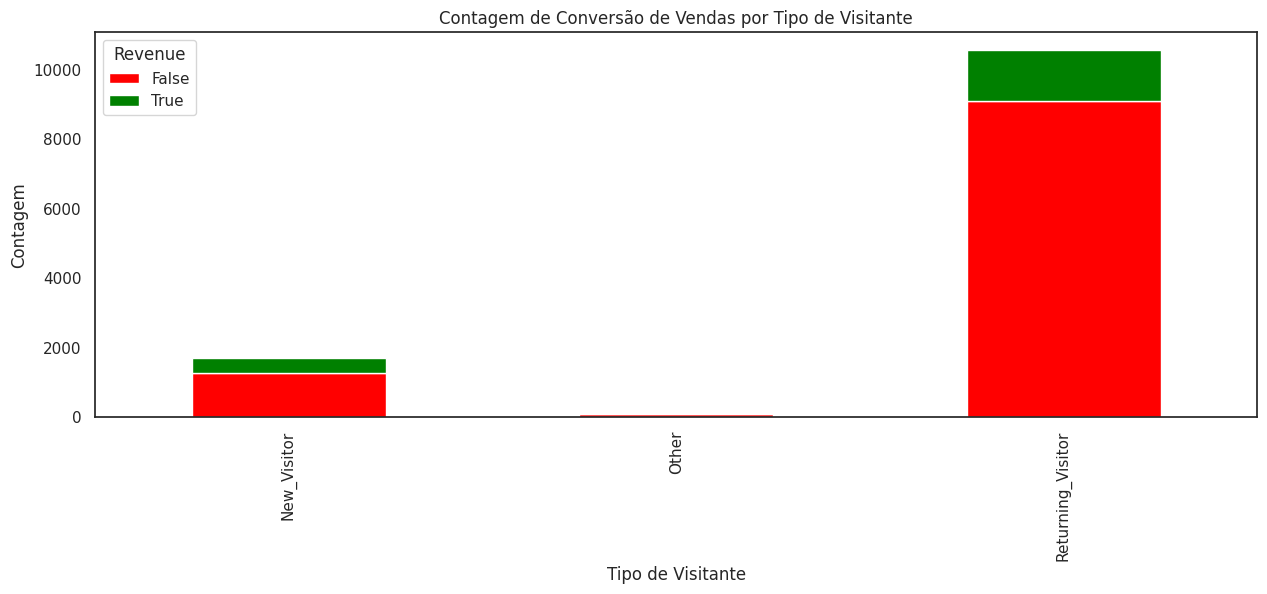

In [21]:
# Criar a tabela de contingência
cross_tab = pd.crosstab(df['VisitorType'], df['Revenue'])

# Plotar o gráfico de barras empilhadas
cross_tab.plot(kind='bar', stacked=True, figsize=(15, 5), color=['red', 'green'])
plt.title('Contagem de Conversão de Vendas por Tipo de Visitante')
plt.xlabel('Tipo de Visitante')
plt.ylabel('Contagem')
plt.show()

Podemos ver que o Visitante que retornou até por sua maior quantidade é o que mais converte em vendas.

Vamos verificar se a compra foi realizada final de semana ou não:

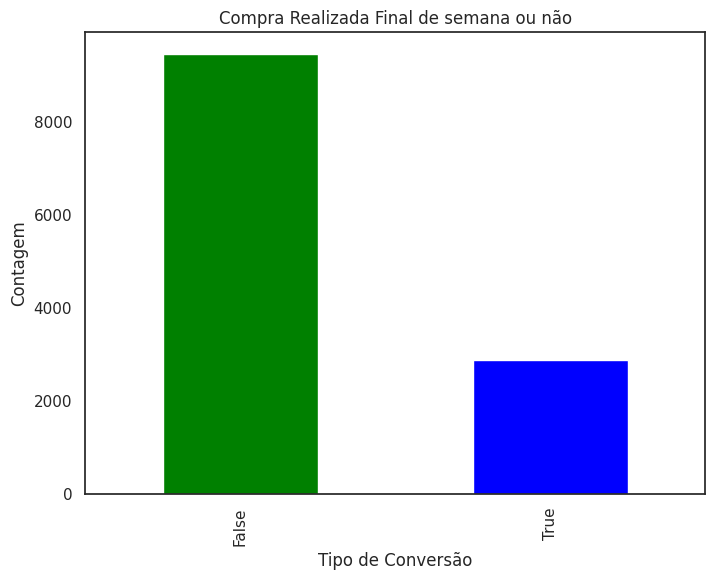

In [22]:
plt.figure(figsize=(8, 6))
df['Weekend'].value_counts().plot(kind='bar', color=['green', 'blue'])
plt.title('Compra Realizada Final de semana ou não')
plt.xlabel('Tipo de Conversão')
plt.ylabel('Contagem')
plt.show()

Nesse caso final de semana não quer dizer que tenha mais vendas, justamente por a maioria dos valores serem False.

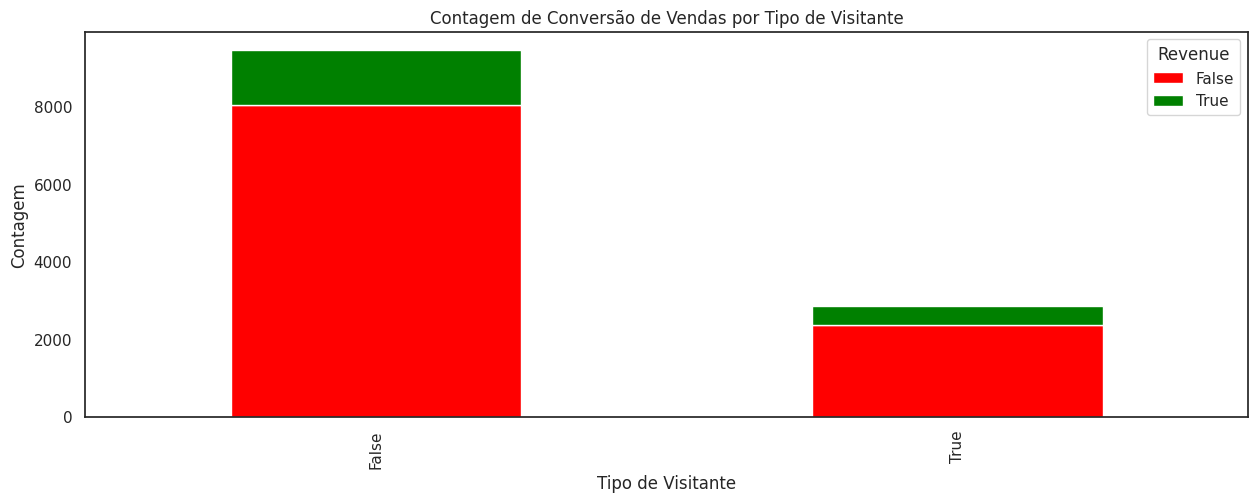

In [23]:
# Criar a tabela de contingência
cross_tab = pd.crosstab(df['Weekend'], df['Revenue'])

# Plotar o gráfico de barras empilhadas
cross_tab.plot(kind='bar', stacked=True, figsize=(15, 5), color=['red', 'green'])
plt.title('Contagem de Conversão de Vendas por Tipo de Visitante')
plt.xlabel('Tipo de Visitante')
plt.ylabel('Contagem')
plt.show()

Mais um staked bar para visualizarmos a conversão de vendas com base no final de semana.

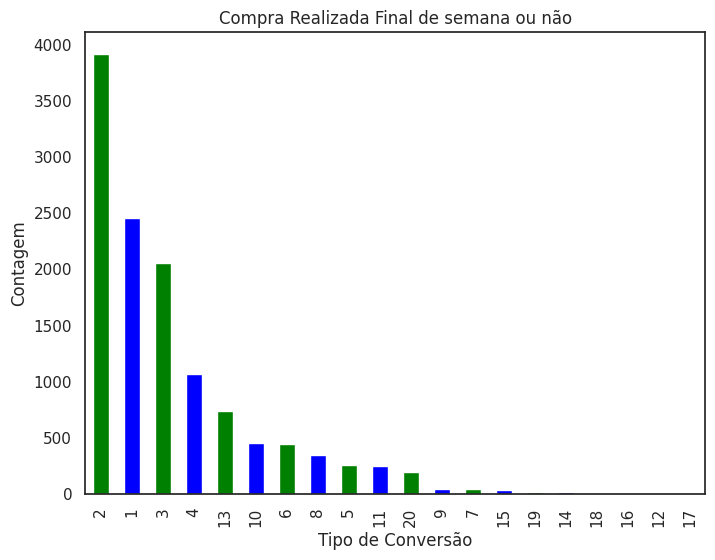

In [24]:
plt.figure(figsize=(8, 6))
df['TrafficType'].value_counts().plot(kind='bar', color=['green', 'blue'])
plt.title('Compra Realizada Final de semana ou não')
plt.xlabel('Tipo de Conversão')
plt.ylabel('Contagem')
plt.show()

Essses traficos estão convertido em numéricos. Porém representa de que forma os usuários vem. Por exemplo em um caso real seria Através do facebook, instagram e etc...

## Pré Processamento

In [25]:
data_original.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


Modelos de machine learning não consegue lidar com letras, apenas numeros. Com base nisso vamos aplicar o Encoder nas variaveis categóricas que estão como string e resolver os eventuais valores missing gerados durante a conversão.

In [26]:
# criar o encoder

lb = LabelEncoder()

#Aplicar o Encoder nas variaveis com string
data_original['Month'] = lb.fit_transform(data_original['Month'])
data_original['VisitorType'] = lb.fit_transform(data_original['Month'])

# Remover valores missing gerados

data_original.dropna(inplace = True)

In [27]:
data_original.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,True,False


Como visualizamos acima, mês e tipo de visitante foram convertidas corretamente.

In [28]:
#Visualizando a dimensão dos dados
data_original.shape

(12330, 18)

Como identificamos na análise exploratória, a variavel alvo Revenue precisa de balanciamento.

In [29]:
variavel_alvo = data_original['Revenue'].value_counts()
variavel_alvo

False    10422
True      1908
Name: Revenue, dtype: int64

In [30]:
#Separando as variaveis idependentes e a preditora (Alvo)
X = data_original.drop('Revenue', axis=1)
y = data_original['Revenue']

Balanciamento de classe - Oversampling

In [31]:
seed = 100

#Criar o balanciador - SMOTE
smote_bal = SMOTE(random_state = seed)

#Aplicando o balanciador
x_res, y_res = smote_bal.fit_resample(X, y)

In [32]:
x_res.shape

(20844, 17)

In [33]:
y_res.shape

(20844,)

Como podemos ver acima, ganhamos mais alguns registros pois quando é feito o balanciamento, é realizado a igualdade de valores com base no dados para que assim o modelo possa aprender igualmente sobre as duas observações.

In [34]:
#separando uma amostra
X = x_res.head(1000)
y = y_res.head(1000)

Agora que os dados estão prontos, vamos aplicar o modelo:

## **Modelo SVM**

### Modelo Base com Kernel Linear

Um modelo kernel de base linear é um modelo de aprendizado de máquina que utiliza uma função de kernel linear para mapear os dados para um espaço de características de maior dimensão.

In [35]:
#Criar o modelo
modelo_v1 = svm.SVC(kernel = 'linear')

In [36]:
#Divisão dos dados de treino e teste
X_treino, X_test, y_treino, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [37]:
# Treinamento
start = time.time()
modelo_v1.fit(X_treino, y_treino)
end = time.time()
print(" Tempo de treinamento: ", end - start)


 Tempo de treinamento:  91.16085958480835


In [38]:
#Previsões
previsoes_v1 = modelo_v1.predict(X_test)

Agora que treinamos o modelo e realizamos as previsões vamos avaliar o modelo com as métricas adequadas:

In [39]:
# Dicionario de métricas

SVM_dict_v1 = {'Modelo':'SVM',
               'Versão':'1',
               'Kernel':'Linear',
               'Precision':precision_score(previsoes_v1, y_test),
               'Recall':recall_score(previsoes_v1, y_test),
               'F1 Score':f1_score(previsoes_v1, y_test),
               'Acurácia':accuracy_score(previsoes_v1, y_test),
               'AUC':roc_auc_score(y_test, previsoes_v1)}

In [40]:
print(' \n Métricas de Teste \n')
SVM_dict_v1

 
 Métricas de Teste 



{'Modelo': 'SVM',
 'Versão': '1',
 'Kernel': 'Linear',
 'Precision': 0.44,
 'Recall': 0.8461538461538461,
 'F1 Score': 0.5789473684210525,
 'Acurácia': 0.9466666666666667,
 'AUC': 0.7163636363636363}

## Modelo com Kernel Linear com Dados Padronizados

Alguns modelos de Machine Learning, performan melhor com os dados padronizados ou seja, na mesma escala. Exemplo:

Digamos que a gente tem um dataset com a variavel salario. Se existir um salariode 10000 e um de 800, eles não estarão na mesma escala, isso pode implicar em alguma distorção no modelo.



In [41]:
#Padronizador
sc = StandardScaler()

In [42]:
#Padronizando os dados de teste
X_treino_scaler = sc.fit_transform(X_treino)
X_test_scaler = sc.transform(X_test)

In [43]:
# Criar a segunda versão do modelo
modelo_v2 = svm.SVC(kernel = 'linear')

In [44]:
# Treinamento
start = time.time()
modelo_v2.fit(X_treino_scaler, y_treino)
end = time.time()
print('Tempo de Treinamento do Modelo:', end - start)

Tempo de Treinamento do Modelo: 0.01599574089050293


In [45]:
previsoes_v2 = modelo_v2.predict(X_test_scaler)

In [46]:
# Dicionário de métricas e metadados
SVM_dict_v2 = {'Modelo':'SVM',
               'Versão':'2',
               'Kernel':'Linear com Dados Padronizados',
               'Precision':precision_score(previsoes_v2, y_test),
               'Recall':recall_score(previsoes_v2, y_test),
               'F1 Score':f1_score(previsoes_v2, y_test),
               'Acurácia':accuracy_score(previsoes_v2, y_test),
               'AUC':roc_auc_score(y_test, previsoes_v2)}

In [47]:
# Imprimindo os resultados da segunda versão
print("Métricas em Teste:\n")
SVM_dict_v2

Métricas em Teste:



{'Modelo': 'SVM',
 'Versão': '2',
 'Kernel': 'Linear com Dados Padronizados',
 'Precision': 0.48,
 'Recall': 0.8571428571428571,
 'F1 Score': 0.6153846153846153,
 'Acurácia': 0.95,
 'AUC': 0.7363636363636362}

Com os dados padronizados, tivemos uma melhora de 1% no desempenho do modelo na métrica de acurácia.

## Otimização de Hiperparâmetros  com Grid Search e Kernel Polinomial




In [48]:
# Cria o modelo
modelo_v3 = svm.SVC(kernel = 'poly')

# Valores para o grid
r_range =  np.array([0.5, 1])
gamma_range =  np.array([0.001, 0.01])
d_range = np.array([2,3, 4])

# Grid de hiperparâmetros
param_grid_poly = dict(gamma = gamma_range, degree = d_range, coef0 = r_range)

# Grid Search
start = time.time()
modelo_v3_grid_search_poly = GridSearchCV(modelo_v3, param_grid_poly, cv = 3)

# Treinamento
modelo_v3_grid_search_poly.fit(X_treino_scaler, y_treino)
end = time.time()
print('Tempo de Treinamento do Modelo com Grid Search:', end - start)

# Acurácia em Treino
print(f"Acurácia em Treinamento: {modelo_v3_grid_search_poly.best_score_ :.2%}")
print("")
print(f"Hiperparâmetros Ideais: {modelo_v3_grid_search_poly.best_params_}")

Tempo de Treinamento do Modelo com Grid Search: 0.23870134353637695
Acurácia em Treinamento: 94.86%

Hiperparâmetros Ideais: {'coef0': 1.0, 'degree': 3, 'gamma': 0.01}


In [49]:
# Previsões
previsoes_v3 = modelo_v3_grid_search_poly.predict(X_test_scaler)

In [50]:
# Dicionário de métricas e metadados
SVM_dict_v3 = {'Modelo':'SVM',
               'Versão':'4',
               'Kernel':'Polinomial com Dados Padronizados',
               'Precision':precision_score(previsoes_v3, y_test),
               'Recall':recall_score(previsoes_v3, y_test),
               'F1 Score':f1_score(previsoes_v3, y_test),
               'Acurácia':accuracy_score(previsoes_v3, y_test),
               'AUC':roc_auc_score(y_test, previsoes_v3)}

In [51]:
# Print
print("Métricas em Teste:\n")
SVM_dict_v3

Métricas em Teste:



{'Modelo': 'SVM',
 'Versão': '4',
 'Kernel': 'Polinomial com Dados Padronizados',
 'Precision': 0.4,
 'Recall': 0.7692307692307693,
 'F1 Score': 0.5263157894736842,
 'Acurácia': 0.94,
 'AUC': 0.6945454545454546}

Com a abordagem de Otimização de padrâmetros polinomial ja não tivemos uma melhora no desempenho se comparado aos outros modelos.

### Otimização de Hiperparâmetros com Grid Search e Kernel RBF

In [52]:
# Cria o modelo
modelo_v4 = svm.SVC(kernel = 'rbf')

# Valores para o grid
C_range = np.array([50., 100., 200.])
gamma_range = np.array([0.3*0.001,0.001,3*0.001])

# Grid de hiperparâmetros
svm_param_grid = dict(gamma = gamma_range, C = C_range)

# Grid Search
start = time.time()
modelo_v4_grid_search_rbf = GridSearchCV(modelo_v4, svm_param_grid, cv = 3)

# Treinamento
modelo_v4_grid_search_rbf.fit(X_treino_scaler, y_treino)
end = time.time()
print('Tempo de Treinamento do Modelo com Grid Search:', end - start)

# Acurácia em Treino
print(f"Acurácia em Treinamento: {modelo_v4_grid_search_rbf.best_score_ :.2%}")
print("")
print(f"Hiperparâmetros Ideais: {modelo_v4_grid_search_rbf.best_params_}")

Tempo de Treinamento do Modelo com Grid Search: 0.22798943519592285
Acurácia em Treinamento: 95.00%

Hiperparâmetros Ideais: {'C': 50.0, 'gamma': 0.003}


In [54]:
# Previsões
previsoes_v4 = modelo_v4_grid_search_rbf.predict(X_test_scaler)

In [55]:
# Dicionário de métricas e metadados
SVM_dict_v4 = {'Modelo':'SVM',
               'Versão':'3',
               'Kernel':'RBF com Dados Padronizados',
               'Precision':precision_score(previsoes_v3, y_test),
               'Recall':recall_score(previsoes_v3, y_test),
               'F1 Score':f1_score(previsoes_v3, y_test),
               'Acurácia':accuracy_score(previsoes_v3, y_test),
               'AUC':roc_auc_score(y_test, previsoes_v3)}

In [56]:
print("Métricas em Teste: \n")
SVM_dict_v3

Métricas em Teste: 



{'Modelo': 'SVM',
 'Versão': '4',
 'Kernel': 'Polinomial com Dados Padronizados',
 'Precision': 0.4,
 'Recall': 0.7692307692307693,
 'F1 Score': 0.5263157894736842,
 'Acurácia': 0.94,
 'AUC': 0.6945454545454546}

In [57]:
# Concatena todos os dicionários em um dataframe do Pandas
resumo = pd.DataFrame({'SVM_Modelo_1':pd.Series(SVM_dict_v1),
                       'SVM_Modelo_2':pd.Series(SVM_dict_v2),
                       'SVM_Modelo_3':pd.Series(SVM_dict_v3),
                       'SVM_Modelo_4':pd.Series(SVM_dict_v4)})

In [58]:
resumo

,SVM_Modelo_1,SVM_Modelo_2,SVM_Modelo_3,SVM_Modelo_4
Modelo,SVM,SVM,SVM,SVM
Versão,1,2,4,3
Kernel,Linear,Linear com Dados Padronizados,Polinomial com Dados Padronizados,RBF com Dados Padronizados
Precision,0.44,0.48,0.4,0.4
Recall,0.846154,0.857143,0.769231,0.769231
F1 Score,0.578947,0.615385,0.526316,0.526316
Acurácia,0.946667,0.95,0.94,0.94
AUC,0.716364,0.736364,0.694545,0.694545


## SVM_Modelo_1 (Versão 1, Kernel Linear):

- Precision: 0.44
- Recall: 0.846154
- F1 Score: 0.578947
- Acurácia: 0.946667
- AUC: 0.716364

Esta abordagem com versão 1 e kernel linear apresenta uma acurácia elevada (94.67%) e um recall relativamente alto (84.62%). Contudo, o precision e o F1 Score são um pouco baixos, sugerindo que, embora o modelo esteja acertando a maioria das previsões positivas, há uma proporção significativa de falsos positivos.

## SVM_Modelo_2 (Versão 2, Kernel Linear com Dados Padronizados):

- Precision: 0.48
- Recall: 0.857143
- F1 Score: 0.615385
- Acurácia: 0.95
- AUC: 0.736364

Comparando com o primeiro modelo, essa abordagem com dados padronizados mostra melhorias em precision, recall e F1 Score. A acurácia também é alta (95%). A padronização dos dados pode ter contribuído para uma performance mais equilibrada.

## SVM_Modelo_3 (Versão 3, Kernel Polinomial com Dados Padronizados):

- Precision: 0.4
- Recall: 0.769231
- F1 Score: 0.526316
- Acurácia: 0.94
- AUC: 0.694545

Esta abordagem, com um kernel polinomial, mostra uma acurácia de 94%, mas o precision e o F1 Score são relativamente mais baixos em comparação com o segundo modelo. O recall também é razoável.

## SVM_Modelo_4 (Versão 4, Kernel RBF com Dados Padronizados):

- Precision: 0.4
- Recall: 0.769231
- F1 Score: 0.526316
- Acurácia: 0.94
- AUC: 0.694545

Semelhante ao terceiro modelo, este também apresenta acurácia de 94%, mas com precision e F1 Score um pouco mais baixos. O recall é consistente com o terceiro modelo.

## Conclusão:

Neste trabalho, realizamos alguns passos até o desenvolvimento do modelo. Primeiro, realizamos uma análise exploratória, onde identificamos distorções nos dados, verificamos valores faltantes e extraímos insights importantes que auxiliaram tanto no entendimento dos dados quanto nas decisões tomadas no pré-processamento. Durante essa etapa, identificamos variáveis desbalanceadas e decodificamos variáveis categóricas para deixá-las aptas à implementação do modelo.

Por fim, implementamos os modelos com diferentes configurações, onde avaliamos métricas de desempenho para investigar como o modelo se sairia em cada cenário.

## Resultados

A versão 2 com kernel linear e dados padronizados parece ser a melhor abordagem, apresentando bons valores de precision, recall e F1 Score, além de uma alta acurácia. No entando é importante ressaltar que a depender do problema e dos custos dos falsos positivos ainda pode ser que o modelo não seja rentável, visto que a classificação errada pode sempre gerar algum tipo de prejuizo.
Monitorar a estabilidade e a generalização do modelo ao longo do tempo é crucial para garantir que ele continue performando bem em dados não vistos.